In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import pandas as pd
import datetime
import marineHeatWaves as mhw #for mhw detection

In [ ]:
# Cargar archivo desde tu computadora local
uploaded = files.upload()

Saving METOFFICE-GLO-SST-L4-REP-OBS-SST_1688793629984.nc to METOFFICE-GLO-SST-L4-REP-OBS-SST_1688793629984.nc


In [ ]:
# Obtener la ruta del archivo cargado
file_name = list(uploaded.keys())[0]

# Cargar el archivo .nc
data = xr.open_dataset(file_name)

# Explorar las variables disponibles
print(data)

<xarray.Dataset>
Dimensions:         (time: 732, lat: 22, lon: 25)
Coordinates:
  * time            (time) datetime64[ns] 2020-01-01T12:00:00 ... 2022-01-01T...
  * lat             (lat) float32 15.73 15.77 15.82 15.88 ... 16.67 16.73 16.77
  * lon             (lon) float32 119.3 119.3 119.4 119.4 ... 120.4 120.4 120.5
Data variables:
    analysis_error  (time, lat, lon) float32 ...
    analysed_sst    (time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:                CF-1.4, ACDD-1.3
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    history:                    Created from sst.nc; obs_anal.nc; seaice.nc
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by

In [ ]:
type(data['analysed_sst'])

xarray.core.dataarray.DataArray

In [ ]:
#convert from kelvin to Celsius
data = data.assign(analysed_sst_C = data['analysed_sst'] - 273.15)

In [ ]:
# add attributes
data['analysed_sst_C'] = data['analysed_sst_C'].assign_attrs({'long name':'analysed sea surface temperature',
                                                              'units':'celsius',
                                                              'commets':'analysed_sst_C = analysed_sst - 273.15'})

In [ ]:
data_year = data['analysed_sst_C'].mean(dim = ['lon','lat'], skipna = True)
data_year

<xarray.DataArray 'analysed_sst_C' (time: 732)>
array([27.958933, 27.92213 , 27.926296, 27.920675, 27.874428, 27.833435,
       27.913874, 28.014503, 28.025955, 27.682081, 27.78283 , 27.63392 ,
       27.589441, 27.556273, 27.574478, 27.601067, 27.424576, 27.402466,
       27.470943, 27.541574, 27.555326, 27.585955, 27.559246, 27.511913,
       27.509516, 27.315664, 27.328547, 27.275131, 27.177143, 27.025133,
       27.029465, 26.98249 , 26.879297, 26.688446, 26.78702 , 27.007917,
       27.003439, 27.012299, 27.09903 , 26.952711, 26.801619, 27.10288 ,
       27.161934, 27.144018, 27.175907, 27.21719 , 27.101185, 27.076342,
       27.043413, 26.972519, 26.82283 , 26.799175, 26.792542, 26.899515,
       26.83644 , 26.898449, 26.695036, 26.779709, 27.389418, 27.426947,
       27.388231, 27.376995, 27.34574 , 27.375254, 27.363825, 27.376442,
       27.674866, 27.776512, 28.016245, 28.334188, 28.113194, 28.003996,
       27.91513 , 27.703243, 27.744286, 27.860117, 27.843994, 27.788908,
       27.844044, 27.8777  , 28.094696, 28.128958, 28.128523, 28.321379,
       28.41702 , 28.458134, 28.475594, 28.548426, 28.68242 , 28.851112,
       28.780388, 28.860723, 28.880434, 28.986246, 28.992031, 29.064915,
       29.062807, 28.988329, 28.929783, 28.9261  , 29.00242 , 29.118109,
       29.050556, 28.968376, 28.687773, 28.810291, 28.816513, 29.083652,
       29.216461, 29.181887, 29.298183, 29.202639, 29.255013, 29.317335,
       29.45581 , 29.512106, 29.49983 , 29.591475, 29.61024 , 29.616123,
...
       30.28622 , 30.10518 , 29.952347, 29.822977, 30.213968, 30.147165,
       30.179976, 30.277046, 30.298908, 30.318933, 30.297674, 30.104816,
       29.908644, 30.754211, 30.695108, 30.73322 , 30.876827, 31.056536,
       30.834429, 30.731236, 30.598812, 30.446173, 30.461042, 30.420918,
       30.440144, 30.295424, 30.204842, 30.188183, 30.057095, 29.931452,
       29.906246, 29.842299, 29.77811 , 29.69547 , 29.637941, 29.635908,
       29.70564 , 29.698015, 30.198256, 30.168085, 30.263582, 30.379902,
       30.456995, 30.242638, 30.153847, 30.000727, 30.294891, 30.285616,
       30.28121 , 30.121304, 30.020723, 29.958113, 29.998352, 30.016415,
       29.96421 , 30.09806 , 30.07    , 30.196825, 30.139734, 30.141111,
       30.202663, 30.15283 , 30.181114, 30.13811 , 30.120846, 30.20731 ,
       30.206367, 30.238787, 30.148787, 29.78053 , 29.73191 , 29.822105,
       30.082901, 30.106295, 30.066923, 30.006731, 29.946657, 29.946997,
       29.840534, 29.634018, 29.577211, 29.361645, 29.27811 , 29.264381,
       29.196657, 29.09058 , 29.068184, 28.96116 , 28.859829, 28.85271 ,
       28.814867, 28.718958, 28.863123, 28.900118, 28.94126 , 28.819149,
       28.73978 , 28.60615 , 28.56668 , 28.497747, 28.557821, 28.561014,
       28.579346, 28.42082 , 28.606462, 28.730024, 28.848423, 28.895397,
       28.821598, 28.554502, 28.526632, 28.571138, 28.54564 , 28.632809],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T12:00:00 ... 2022-01-01T12:00:00

In [ ]:
temp = data_year.data
date = data_year['time'].data.astype('datetime64[D]')

date

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

In [ ]:
date_datetime = date.tolist()
date_datetime_ordinal = np.asarray([datetime.date.toordinal(tt) for tt in date_datetime])
date_datetime_ordinal[0:10]

array([737425, 737426, 737427, 737428, 737429, 737430, 737431, 737432,
       737433, 737434])

In [ ]:
mhws, clim = mhw.detect(date_datetime_ordinal, temp)

In [ ]:
mhws.keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])

In [ ]:
clim.keys()

dict_keys(['thresh', 'seas', 'missing'])

In [ ]:
print(date[0])
print(date[-1])
print(mhws['n_events'])

2020-01-01
2022-01-01
7


In [ ]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))
ev

Maximum intensity: 1.243630870696041 deg. C
Average intensity: 0.9227048607282793 deg. C
Cumulative intensity: 5.536229164369676 deg. C-days
Duration: 6 days
Start date: 08 June 2020
End date: 13 June 2020


1

In [ ]:
mhws['date_start']

[datetime.date(2020, 5, 6),
 datetime.date(2020, 6, 8),
 datetime.date(2020, 7, 26),
 datetime.date(2020, 9, 8),
 datetime.date(2020, 10, 3),
 datetime.date(2021, 3, 16),
 datetime.date(2021, 11, 21)]

In [ ]:
mhws['date_end']

[datetime.date(2020, 5, 10),
 datetime.date(2020, 6, 13),
 datetime.date(2020, 7, 31),
 datetime.date(2020, 9, 15),
 datetime.date(2020, 10, 7),
 datetime.date(2021, 3, 20),
 datetime.date(2021, 11, 27)]

Text(0, 0.5, 'SST [$^\\circ$C]')

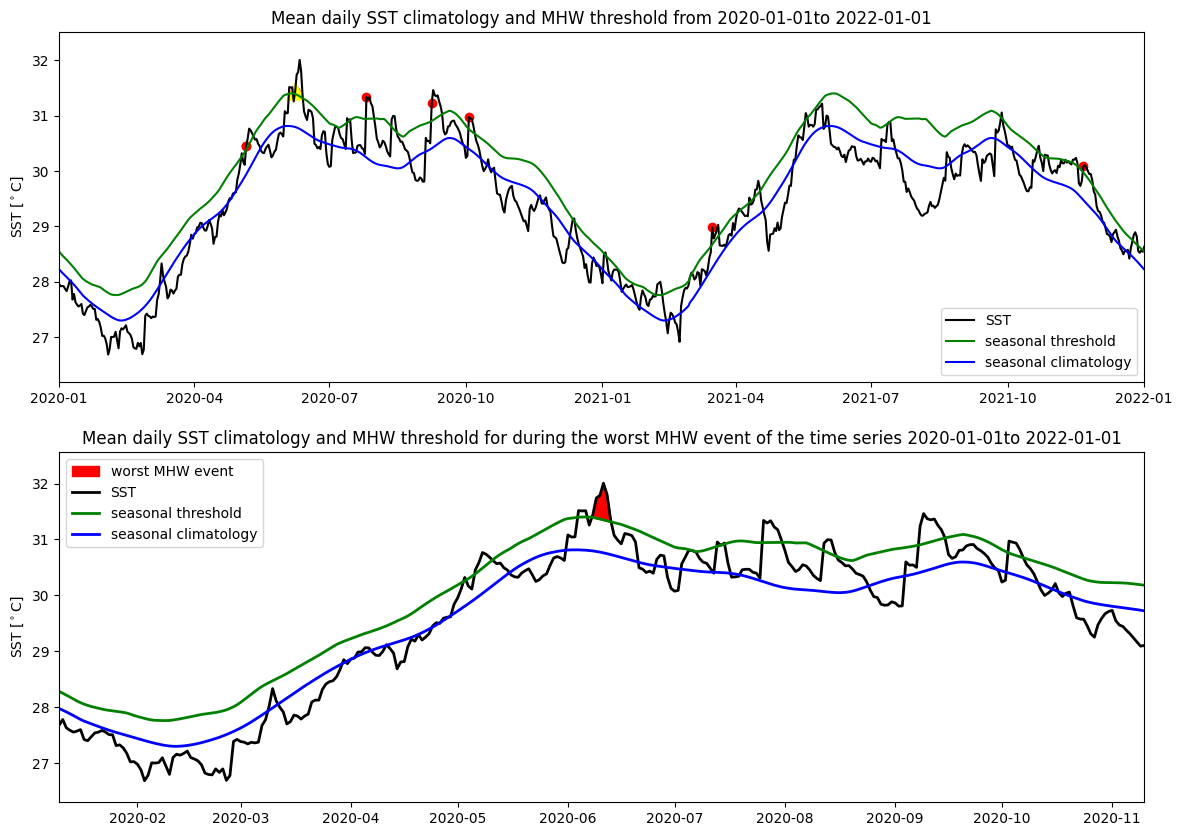

In [ ]:
#create 2 plots axe1 and axe2
fig, (axe1, axe2) = plt.subplots(2,1, figsize=(14,10))

axe1.plot(date, temp, 'k-', label = 'SST')                                        #datos en x = fechas , y = temperatura en C
axe1.plot(date, clim['thresh'], 'g-', label = 'seasonal threshold')               #curva en x = fechas , y = clim thresh
axe1.plot(date, clim['seas'], 'b-', label = 'seasonal climatology')               #curva en x = fechas , y = clim seas

axe1.set_title("Mean daily SST climatology and MHW threshold from " + str(date[0]) + "to " + str(date[-1]))     #titulo de la figura
axe1.legend(loc = 'lower right')                                                  #Ubicacion de las etiquetas

#date limites about the plot
axe1.set_xlim(date[0], date[-1])                                                  #limite inferior y superior
axe1.set_ylim(temp.min() - 0.5, temp.max() + 0.5)                                 #limites verticales inferior y superior
axe1.set_ylabel(r'SST [$^\circ$C]')

for ev0 in np.arange(ev-10, ev+11, 1):
  try:
    t1 = np.where(date_datetime_ordinal == mhws['time_start'][ev0])[0][0]
    t2 = np.where(date_datetime_ordinal == mhws['time_end'][ev0])[0][0]
    axe1.scatter(date[t1], temp[t1], color='red', marker='o', label='Start')
    axe2.fill_between(date[t1: t2+1], temp[t1: t2+1], clim['thresh'][t1: t2+1], color=(1, 0.6, 0,5, .5))
  except:
    if ev0 < ev:
      ev0 += 1
    else:
      break

t1 = np.where(date_datetime_ordinal == mhws['time_start'][ev0])[0][0]
t2 = np.where(date_datetime_ordinal == mhws['time_end'][ev0])[0][0]
axe1.scatter(date[t1], temp[t1], color='yellow', marker='^', label='Start', s = 150)
axe2.fill_between(date[t1: t2+1], temp[t1: t2+1], clim['thresh'][t1: t2+1], color='r', label = 'worst MHW event')

axe2.plot(date, temp, 'k-', linewidth = 2, label = 'SST')
axe2.plot(date, clim['thresh'], 'g-', linewidth = 2, label = 'seasonal threshold')
axe2.plot(date, clim['seas'], 'b-', linewidth = 2, label = 'seasonal climatology')

axe2.set_title("Mean daily SST climatology and MHW threshold for during the worst MHW event of the time series " + str(date[0]) + "to " + str(date[-1]))
axe2.legend()
axe2.set_xlim(date[t1] - np.timedelta64(150, 'D'), date[t2]+ np.timedelta64(150, 'D'))
axe2.set_ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + .5)
axe2.set_ylabel(r'SST [$^\circ$C]')
